In [15]:
import os
import sklearn
from skimage import io
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
import sys
sys.path.append('../')
from src.data.preprocessing import *
import torch as tc
from src.dataset.dataloader import *


In [16]:
import importlib
import sys
importlib.reload(sys.modules['src.data.preprocessing'])
importlib.reload(sys.modules['src.dataset.dataloader'])
from src.data.preprocessing import *
from src.dataset.dataloader import *

In [17]:
img_dir = "../data/raw"
dataset_raw = CREDO_Dataset(img_dir, False)
dataset_proprop = CREDO_Dataset(img_dir, True)

In [18]:
dataloader_raw = tc.utils.data.DataLoader(dataset_raw)
dataloader_preprop = tc.utils.data.DataLoader(dataset_proprop)

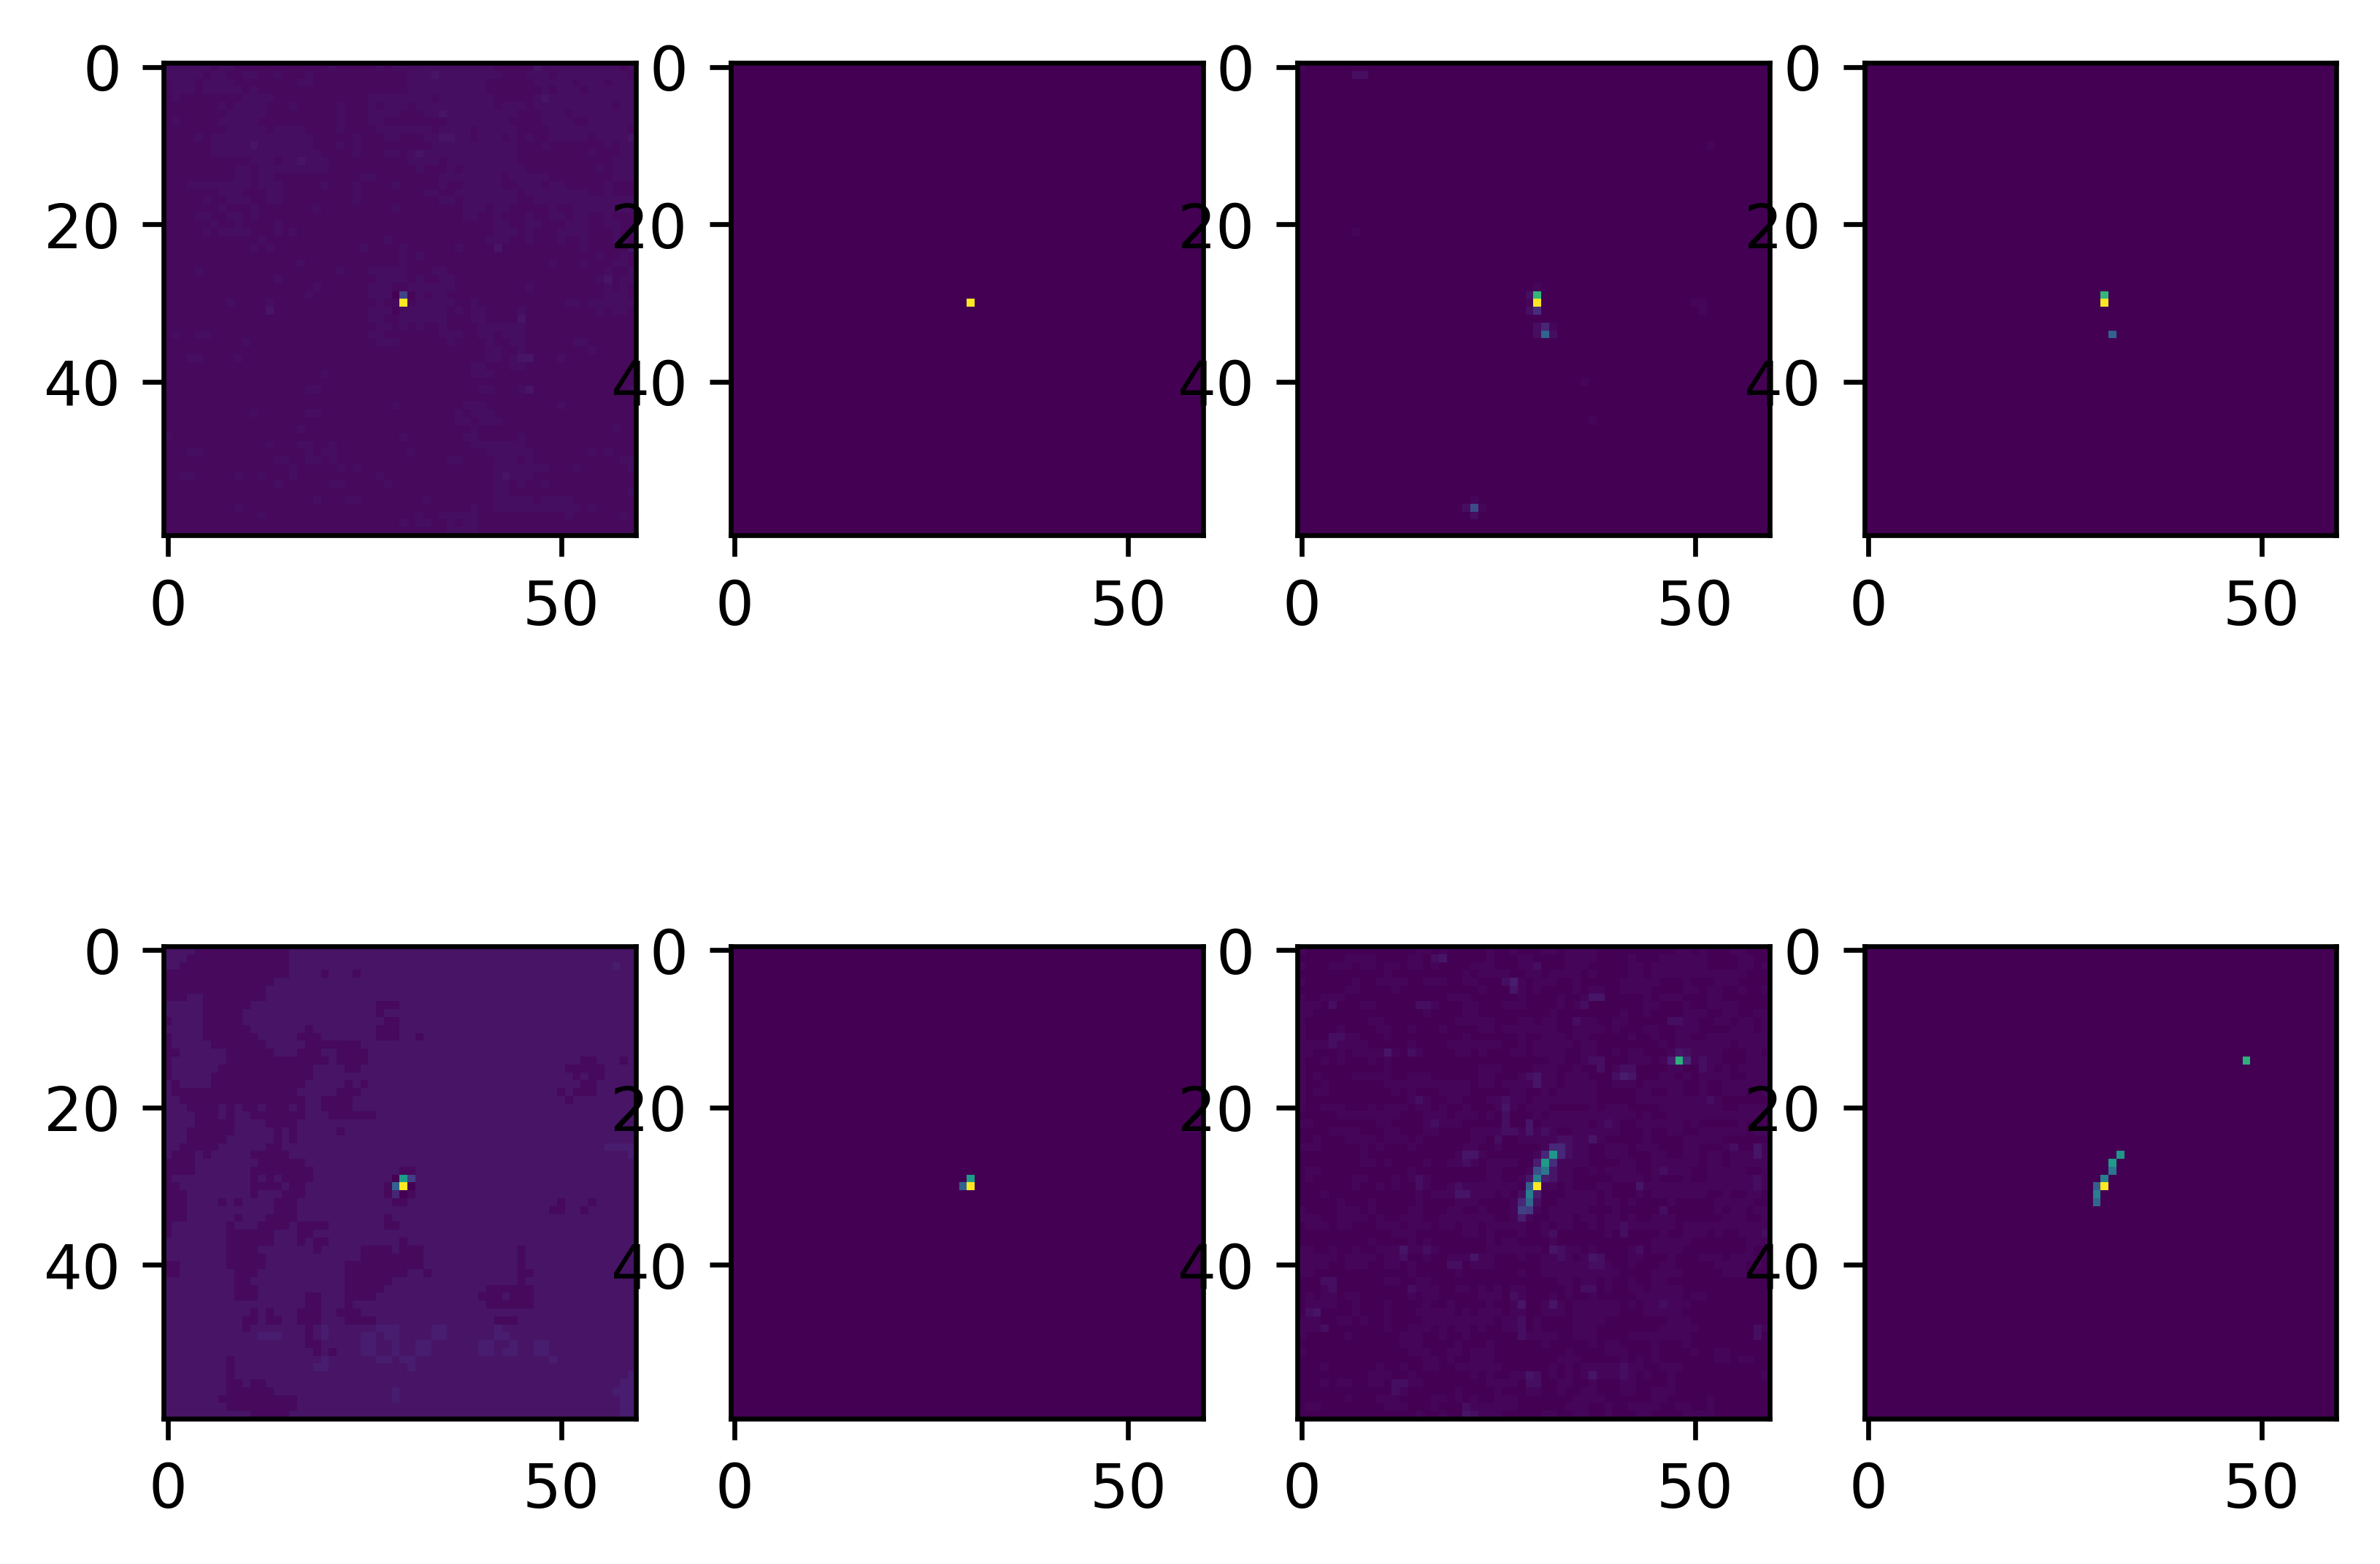

In [19]:
fig = plt.figure(dpi=600)
#offset = 4*2 <- potężna anomalia!!!
offset = 4*1
for i in range(4):
    img = dataset_raw[i+offset][0]
    plt.subplot(2, 4, 1+i*2)
    plt.imshow(img)
    plt.subplot(2, 4, 2+i*2)
    plt.imshow(dataset_proprop[i+offset][0])


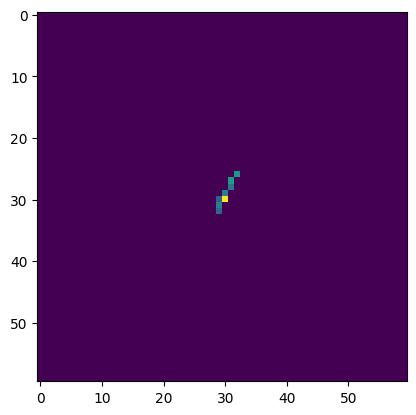

In [20]:
from skimage.morphology import opening, closing

image = dataset_raw[7][0]
image = norm(image) #Very important!!!
image = image * 255
image = masking(image, threshold_2(image))
plt.imshow(image)
image = remove_dust(image)
plt.imshow(image)